# Classifying Vulnerability Severity Score

In [6]:
import pandas as pd

In [7]:
ml_data = pd.read_csv('../../../ipynb/data/ml_data.csv', usecols=[0,2,3,4])
print(ml_data.head())

          cve_id  base_score commit_date  days_until_published_by_nvd
0  CVE-2017-0028        10.0  2017-01-12                          186
1  CVE-2017-0152         9.3  2017-03-09                          130
2  CVE-2017-0196         4.3  2017-01-19                          179
3  CVE-2017-0375         5.0  2017-06-05                            4
4  CVE-2017-0376         5.0  2017-06-05                            4


## Label the base_score
* Q1 = [0.0, 2.5] severity
* Q2 = (2.5, 5.0] severity
* Q3 = (5.0, 7.5] severity
* Q4 = (7.5, 10.0] severity

In [172]:
ml_data['label'] = ''

ml_data.loc[ml_data.base_score <= 2.5, 'label'] = 'Q1' 
ml_data.loc[(ml_data.base_score > 2.5) & (ml_data.base_score <= 5.0), 'label'] = 'Q2' 
ml_data.loc[(ml_data.base_score > 5.0) & (ml_data.base_score < 7.5), 'label'] = 'Q3'
ml_data.loc[ml_data.base_score >= 7.5, 'label'] = 'Q4'

print(ml_data.head())

          cve_id  base_score commit_date  days_until_published_by_nvd label
0  CVE-2017-0028        10.0  2017-01-12                          186    Q4
1  CVE-2017-0152         9.3  2017-03-09                          130    Q4
2  CVE-2017-0196         4.3  2017-01-19                          179    Q2
3  CVE-2017-0375         5.0  2017-06-05                            4    Q2
4  CVE-2017-0376         5.0  2017-06-05                            4    Q2


In [173]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,9]

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [174]:
train = ml_data.drop(['cve_id', 'commit_date'], axis=1)

In [175]:
labelEncoder = LabelEncoder()
labelEncoder.fit(train['label'])
train['label'] = labelEncoder.transform(train['label'])

In [176]:
print(train.head())

   base_score  days_until_published_by_nvd  label
0        10.0                          186      3
1         9.3                          130      3
2         4.3                          179      1
3         5.0                            4      1
4         5.0                            4      1


In [177]:
#X = np.array(train.drop(['base_score'], 1))
X = np.array(train)

Text(0, 0.5, 'Severity Class')

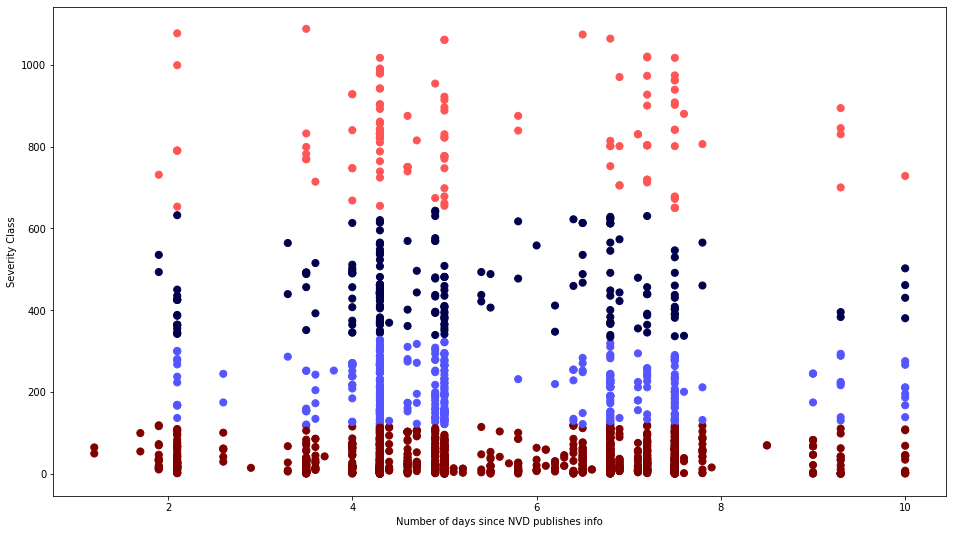

In [178]:
est = KMeans(4)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='seismic_r')
plt.xlabel('Number of days since NVD publishes info')
plt.ylabel('Severity Class')

In [179]:
from sklearn import svm

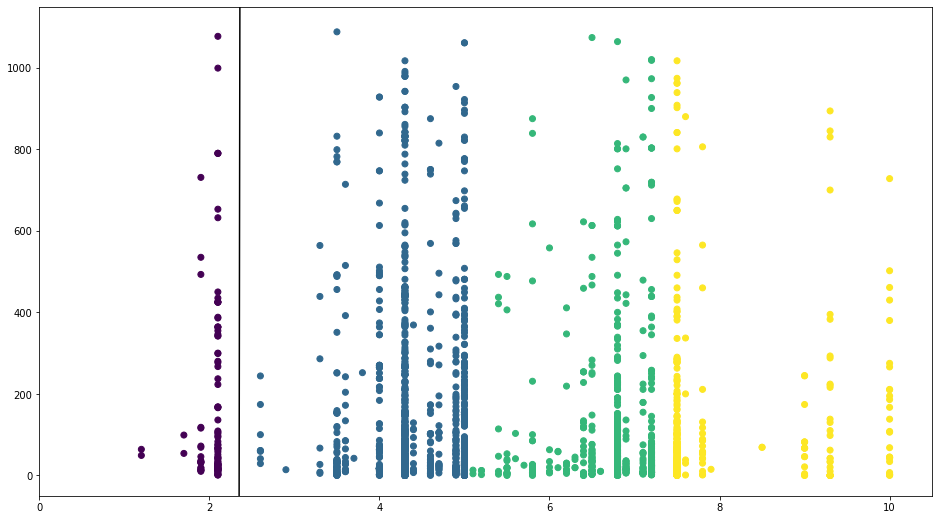

In [180]:
X = np.array(train.drop(['label'], 1))
y = np.array(train['label'])

clf = svm.SVC(kernel='linear')
clf.fit(X,y)

w = clf.coef_[0]

a = -w[0] / w[1]

xx = np.linspace(0, 12)
yy = a * xx - (clf.intercept_[0] / w[1])

h0 = plt.plot(xx, yy, 'k-')

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.ylim(-50, 1150)
plt.xlim(0,10.5)
plt.show()